<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Assignment_09/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This would be similar to your individual project but is smaller in scope. For example,
You can pick a dataset and explore it. Provide background, analysis and visualization. 
or you can pick a Python data visualization library (Altair, Bokeh, Plotly Express, Seaborn, etc.) or other libraries of your interest.  Learn and use it on a dataset. 
Make sure you make the project well styled and easy to follow. It does not need to be huge and long. Just good enough to show that you learn something new in a new dataset or learn something new in a new library.
I expect you to continue to find interesting datasets and Python libraries and try them in your leisure time. Create mini projects in GitHub as you learn and practice. 
Please submit the GitHub link to your assignment as usual.
Happy Thanksgiving!

1. What is your issue of interest (provide sufficient background information)?
This assignment I'm looking at AirBnB data for Asheville, North Carolina. I'm specifically looking at type of accomodation, price, 

2. What questions do you have in mind and would like to answer?
3. Where do you get the data to help answer your questions?
4. What will be your unit of analysis (for example, patient, organization, or country)? Roughly how many units (observations) do you expect to analyze?
5. What variables/measures do you plan to use in your analysis (variables should be tied to the questions in #3)?
6. What kinds of techniques do you plan to use (for example, summary statistics, scatter plot, bar chart, chi-squared test)?

In [41]:
# 1 - Import necessary libraries
import pandas as pd
import seaborn as sns
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [55]:
df = pd.read_csv("listings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2099 non-null   int64  
 1   listing_url                                   2099 non-null   object 
 2   scrape_id                                     2099 non-null   int64  
 3   last_scraped                                  2099 non-null   object 
 4   name                                          2099 non-null   object 
 5   description                                   2094 non-null   object 
 6   neighborhood_overview                         1703 non-null   object 
 7   picture_url                                   2099 non-null   object 
 8   host_id                                       2099 non-null   int64  
 9   host_url                                      2099 non-null   o

In [56]:
df = pd.DataFrame(df,columns=['host_response_rate','host_identity_verified','room_type', 'bedrooms','price','number_of_reviews','review_scores_rating'])
df.head()

,host_response_rate,host_identity_verified,room_type,bedrooms,price,number_of_reviews,review_scores_rating
0,83%,t,Entire home/apt,1.0,$80.00,89,90.0
1,98%,t,Entire home/apt,1.0,$93.00,271,91.0
2,98%,t,Shared room,1.0,$30.00,280,94.0
3,0%,f,Private room,1.0,$125.00,58,99.0
4,100%,t,Entire home/apt,1.0,$134.00,56,97.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_rate      1974 non-null   object 
 1   host_identity_verified  0 non-null      float64
 2   room_type               2099 non-null   object 
 3   bedrooms                1944 non-null   float64
 4   number_of_reviews       2099 non-null   int64  
 5   review_scores_rating    1979 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 98.5+ KB


In [7]:
df.isnull().sum()

host_response_rate            125
host_acceptance_rate           78
host_is_superhost               0
host_total_listings_count       0
host_identity_verfified      2099
room_type                       0
bedrooms                      155
number_of_reviews               0
review_scores_rating          120
dtype: int64

In [16]:
mean_bedrooms = np.mean(df['bedrooms'])
mean_bedrooms

1.7680041152263375

In [58]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

In [59]:
df['price'].min()

19.0

In [60]:
df['price'].max()

24999.0

In [61]:
mean_price = np.mean(df['price'])
mean_price

180.016655550262

In [29]:
def mean_fun(x,y):
    mean_sample = np.mean((y.sample(20)))
    mean_total = np.mean(df['price'])
    mean_diff = mean_total - mean_sample
    return mean_diff

In [30]:
mean_fun(100,df['price'])

37.01665555026199

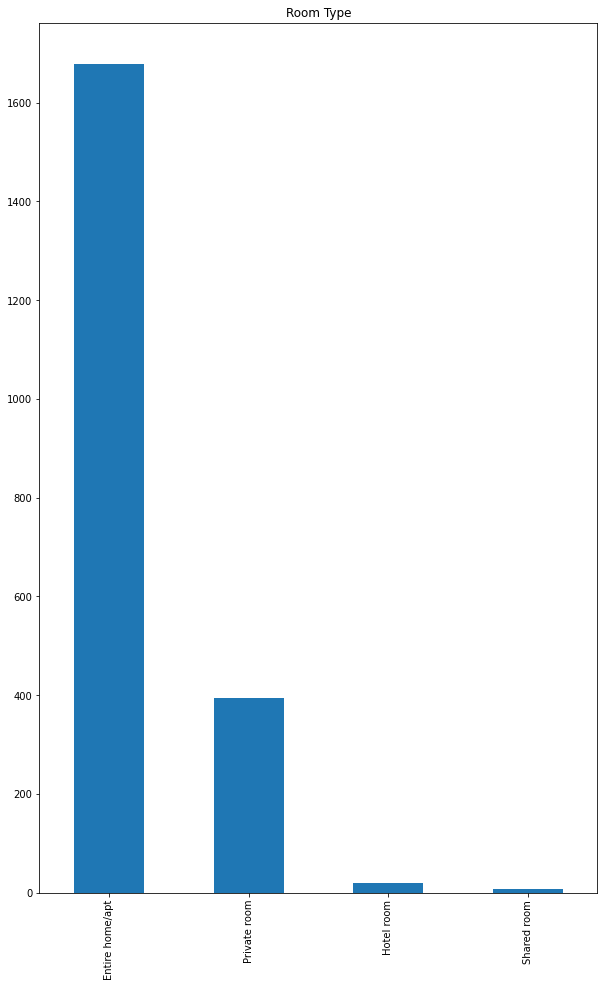

In [32]:
df['room_type'].value_counts().plot(kind='bar', title='Room Type', figsize=(10,16))  
plt.show()

In [33]:
df['number_of_reviews'].min()

0

In [34]:
df['number_of_reviews'].max()

976

In [35]:
mean_reviews = np.mean(df['number_of_reviews'])
mean_reviews

80.16769890424011

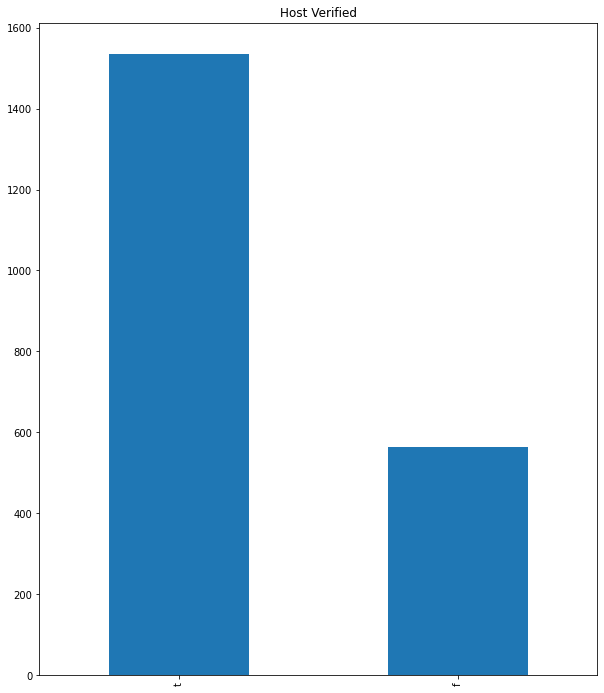

In [37]:
df['host_identity_verified'].value_counts().plot(kind='bar', title='Host Verified', figsize=(10,12))  
plt.show()

In [38]:
df['review_scores_rating'].min()

67.0

In [39]:
df['review_scores_rating'].max()

100.0

In [40]:
mean_review_score = np.mean(df['review_scores_rating'])
mean_review_score

97.73218797372411

In [50]:
alt.Chart(df).mark_point().encode(x='room_type',y='price',color='room_type').properties(width=500,height=500)

alt.Chart(...)